In [ ]:
#Carga de librerias
import kagglehub
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Carga del dataset

path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

print("Path to dataset files:", path)

archivos = os.listdir(path)
for archivo in archivos:
  print(os.path.join(path, archivo))

stroke_dataset = pd.read_csv("/root/.cache/kagglehub/datasets/fedesoriano/stroke-prediction-dataset/versions/1/healthcare-dataset-stroke-data.csv")

stroke_dataset

100%|██████████| 67.4k/67.4k [00:00<00:00, 29.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/stroke-prediction-dataset/versions/1
/root/.cache/kagglehub/datasets/fedesoriano/stroke-prediction-dataset/versions/1/healthcare-dataset-stroke-data.csv


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#Explracion inicial

# Información general de las columnas y tipos de datos
print("Informacion")
print(stroke_dataset.info())

# Estadísticas descriptivas generales
print("\nDescripcion")
print(stroke_dataset.describe())

#Verificamos valores nulos
print("\nValores nulos")
print("Valores nulos por columna:\n",stroke_dataset.isnull().sum())

#Verificamos valores duplicados
print("\nValores duplicados")
print("Valores duplicados:\n",stroke_dataset.duplicated().sum())

#Distribucion de la variable objetivo "stroke"
print("\nDistribucion de la variable objetivo")
print("Distribucion de la variable 'stroke':\n",stroke_dataset["stroke"].value_counts())

Informacion
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

Descripcion
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000 


Histograma de la Edad


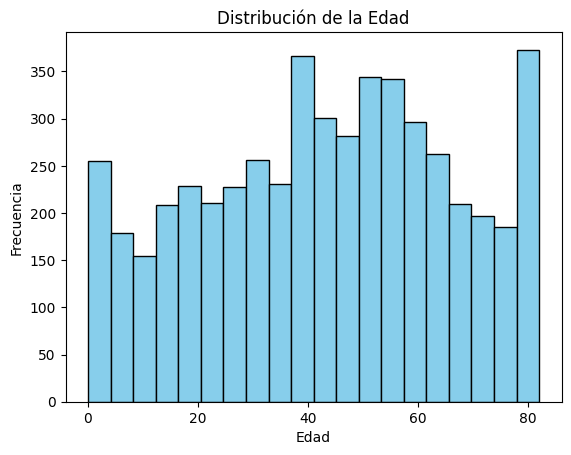


Histograma del Nivel Promedio de Glucosa


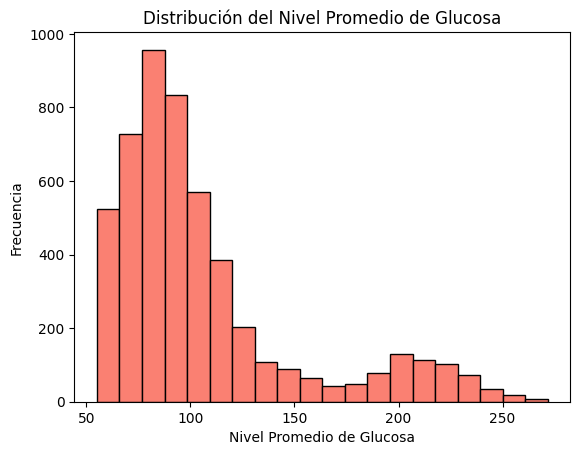


Histograma del Índice de Masa Corporal (BMI)


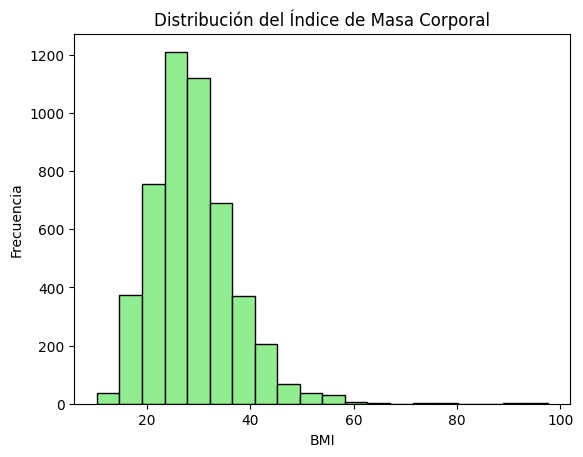

In [ ]:
#Analisis Univariado

#Variables Numericas
"""Para las variables numéricas (age, avg_glucose_level, bmi), se pueden generar
histogramas que permitan visualizar su distribución:"""

import matplotlib.pyplot as plt

# Análisis Univariado - Variables Numéricas

# Histograma de la edad
print("\nHistograma de la Edad")
plt.hist(stroke_dataset['age'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Histograma del nivel promedio de glucosa
print("\nHistograma del Nivel Promedio de Glucosa")
plt.hist(stroke_dataset['avg_glucose_level'], bins=20, edgecolor='black', color='salmon')
plt.title('Distribución del Nivel Promedio de Glucosa')
plt.xlabel('Nivel Promedio de Glucosa')
plt.ylabel('Frecuencia')
plt.show()

# Histograma del BMI
print("\nHistograma del Índice de Masa Corporal (BMI)")
plt.hist(stroke_dataset['bmi'], bins=20, edgecolor='black', color='lightgreen')
plt.title('Distribución del Índice de Masa Corporal')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.show()



Boxplot de la Edad


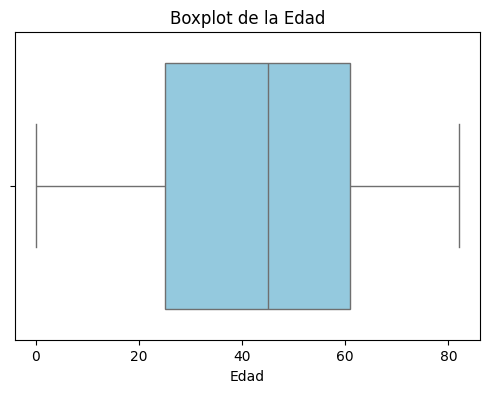


Boxplot del Nivel Promedio de Glucosa


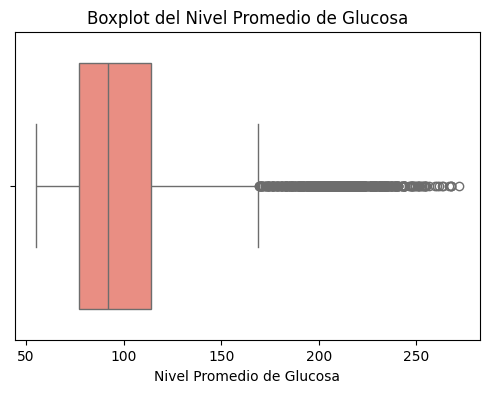


Boxplot del Índice de Masa Corporal (BMI)


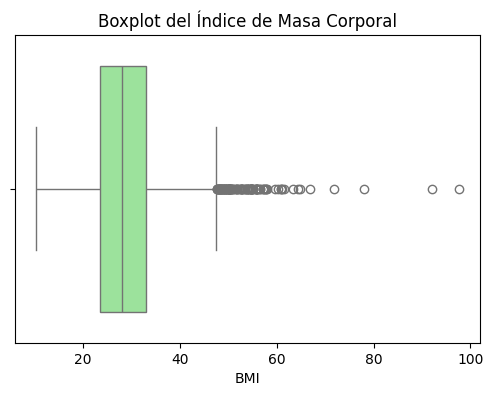


Valores atípicos detectados:
Edad: 0 valores atípicos
Nivel Promedio de Glucosa: 627 valores atípicos
BMI: 110 valores atípicos

Valores atípicos en Edad:
 Series([], Name: age, dtype: float64)

Valores atípicos en Nivel de Glucosa:
 0       228.69
1       202.21
3       171.23
4       174.12
5       186.21
         ...  
5061    223.78
5062    211.58
5063    179.38
5064    193.88
5076    174.37
Name: avg_glucose_level, Length: 627, dtype: float64

Valores atípicos en BMI:
 21      48.9
113     56.6
254     50.1
258     54.6
270     60.9
        ... 
4858    47.6
4906    54.1
4952    56.6
5009    49.5
5057    47.6
Name: bmi, Length: 110, dtype: float64


In [ ]:
# Análisis de Valores Atípicos - Boxplots y Rango Intercuartil (IQR)

# Boxplot de la edad
print("\nBoxplot de la Edad")
plt.figure(figsize=(6, 4))
sns.boxplot(x=stroke_dataset['age'], color='skyblue')
plt.title('Boxplot de la Edad')
plt.xlabel('Edad')
plt.show()

# Boxplot del nivel promedio de glucosa
print("\nBoxplot del Nivel Promedio de Glucosa")
plt.figure(figsize=(6, 4))
sns.boxplot(x=stroke_dataset['avg_glucose_level'], color='salmon')
plt.title('Boxplot del Nivel Promedio de Glucosa')
plt.xlabel('Nivel Promedio de Glucosa')
plt.show()

# Boxplot del BMI
print("\nBoxplot del Índice de Masa Corporal (BMI)")
plt.figure(figsize=(6, 4))
sns.boxplot(x=stroke_dataset['bmi'], color='lightgreen')
plt.title('Boxplot del Índice de Masa Corporal')
plt.xlabel('BMI')
plt.show()

# --- Detección de Valores Atípicos con el Método IQR ---

def detectar_outliers(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar valores fuera de los límites
    outliers = columna[(columna < limite_inferior) | (columna > limite_superior)]
    return outliers

# Detección de valores atípicos en cada variable
outliers_age = detectar_outliers(stroke_dataset['age'])
outliers_glucose = detectar_outliers(stroke_dataset['avg_glucose_level'])
outliers_bmi = detectar_outliers(stroke_dataset['bmi'])

# Mostrar cantidad de valores atípicos encontrados
print("\nValores atípicos detectados:")
print(f"Edad: {len(outliers_age)} valores atípicos")
print(f"Nivel Promedio de Glucosa: {len(outliers_glucose)} valores atípicos")
print(f"BMI: {len(outliers_bmi)} valores atípicos")

# Opcional: Mostrar valores atípicos detectados (descomentar si deseas verlos)
print("\nValores atípicos en Edad:\n", outliers_age)
print("\nValores atípicos en Nivel de Glucosa:\n", outliers_glucose)
print("\nValores atípicos en BMI:\n", outliers_bmi)


¿Que hacer con los valores atípicos?
Decidimos mantener los valores atípicos porque son parte natural de la población.
Un nivel muy alto de glucosa, un IMC extremadamente alto o bajo, o una edad avanzada podrían estar directamente relacionados con la probabilidad de sufrir un ataque cerebral. Si eliminamos estos valores extremos, podriamos estar quitando pacientes que efectivamente sufrieron un ataque debido a estas condiciones, lo que reduciría la capacidad predictiva del modelo.


Distribución de la variable 'gender'


<ipython-input-5-bda8936928a9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=stroke_dataset[var], palette='pastel', order=stroke_dataset[var].value_counts().index)


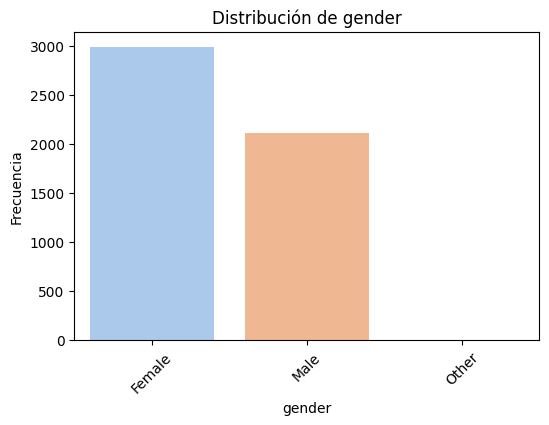


Distribución de la variable 'hypertension'


<ipython-input-5-bda8936928a9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=stroke_dataset[var], palette='pastel', order=stroke_dataset[var].value_counts().index)


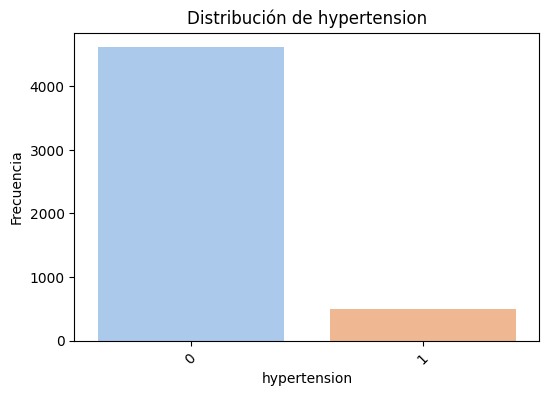


Distribución de la variable 'heart_disease'


<ipython-input-5-bda8936928a9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=stroke_dataset[var], palette='pastel', order=stroke_dataset[var].value_counts().index)


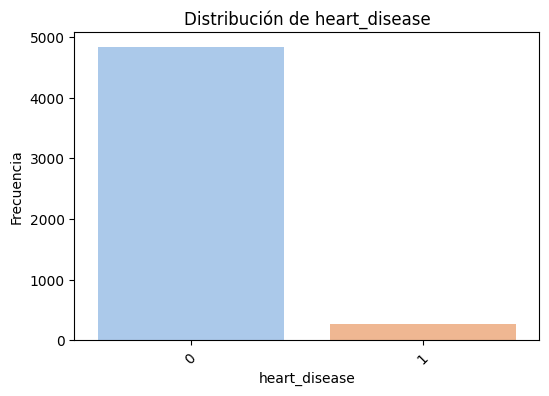


Distribución de la variable 'ever_married'


<ipython-input-5-bda8936928a9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=stroke_dataset[var], palette='pastel', order=stroke_dataset[var].value_counts().index)


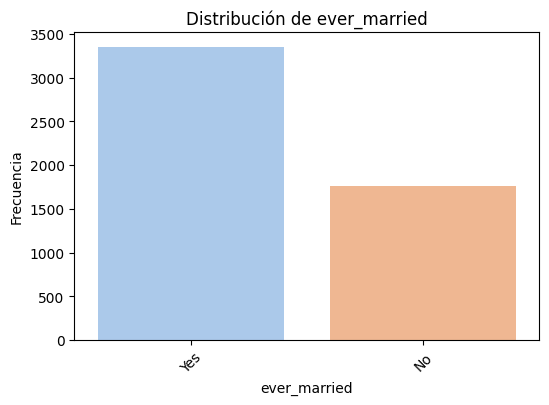


Distribución de la variable 'work_type'


<ipython-input-5-bda8936928a9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=stroke_dataset[var], palette='pastel', order=stroke_dataset[var].value_counts().index)


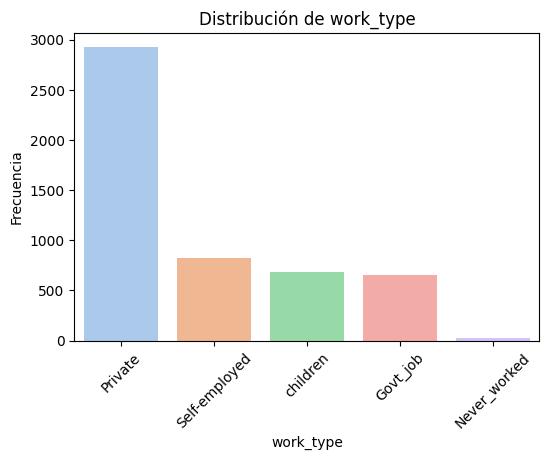


Distribución de la variable 'Residence_type'


<ipython-input-5-bda8936928a9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=stroke_dataset[var], palette='pastel', order=stroke_dataset[var].value_counts().index)


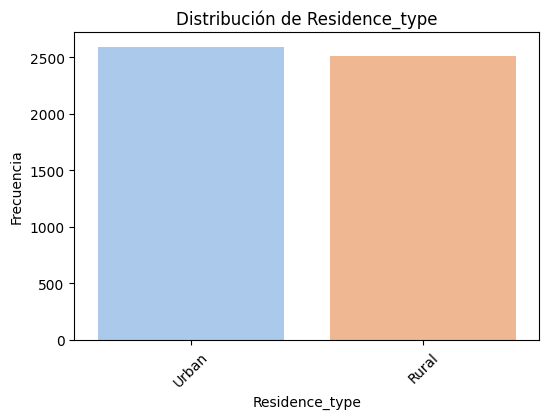


Distribución de la variable 'smoking_status'


<ipython-input-5-bda8936928a9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=stroke_dataset[var], palette='pastel', order=stroke_dataset[var].value_counts().index)


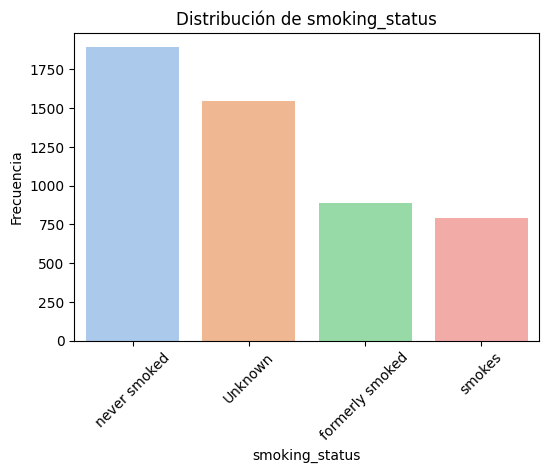

In [ ]:
# Análisis Univariado - Variables Categóricas

# Lista de variables categóricas
categorical_vars = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Gráficos de barras para cada variable categórica
for var in categorical_vars:
    print(f"\nDistribución de la variable '{var}'")
    plt.figure(figsize=(6, 4))
    sns.countplot(x=stroke_dataset[var], palette='pastel', order=stroke_dataset[var].value_counts().index)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
    plt.show()


#Analisis Bivariado
Relacion entre varables numericas y la variable objetivo


Boxplot de la Edad vs. ACV


<ipython-input-6-64068e9f1f40>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='age', data=stroke_dataset, palette='pastel')


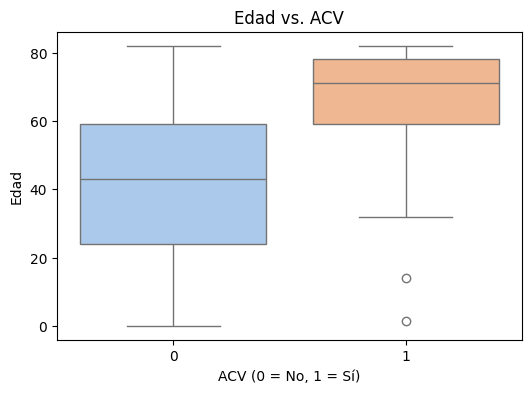


Boxplot del Nivel Promedio de Glucosa vs. ACV


<ipython-input-6-64068e9f1f40>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='avg_glucose_level', data=stroke_dataset, palette='pastel')


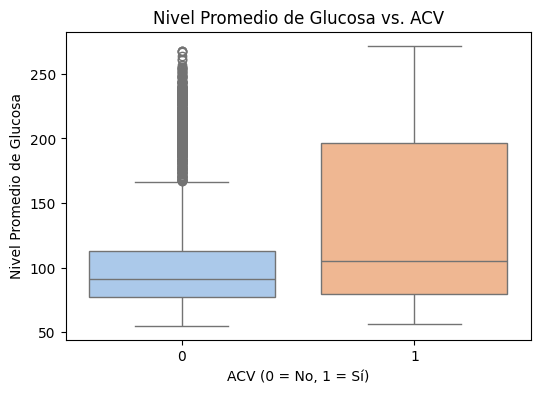


Boxplot del Índice de Masa Corporal (BMI) vs. ACV


<ipython-input-6-64068e9f1f40>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='bmi', data=stroke_dataset, palette='pastel')


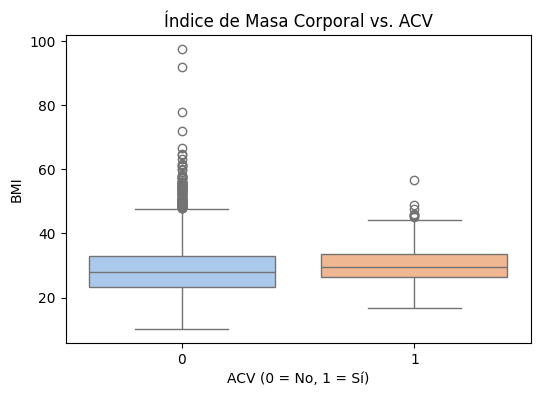

In [ ]:
# Análisis Bivariado - Variables Numéricas vs. Variable Objetivo (Stroke)

# Boxplot de la edad vs. ACV
print("\nBoxplot de la Edad vs. ACV")
plt.figure(figsize=(6, 4))
sns.boxplot(x='stroke', y='age', data=stroke_dataset, palette='pastel')
plt.title('Edad vs. ACV')
plt.xlabel('ACV (0 = No, 1 = Sí)')
plt.ylabel('Edad')
plt.show()

# Boxplot del nivel promedio de glucosa vs. ACV
print("\nBoxplot del Nivel Promedio de Glucosa vs. ACV")
plt.figure(figsize=(6, 4))
sns.boxplot(x='stroke', y='avg_glucose_level', data=stroke_dataset, palette='pastel')
plt.title('Nivel Promedio de Glucosa vs. ACV')
plt.xlabel('ACV (0 = No, 1 = Sí)')
plt.ylabel('Nivel Promedio de Glucosa')
plt.show()

# Boxplot del BMI vs. ACV
print("\nBoxplot del Índice de Masa Corporal (BMI) vs. ACV")
plt.figure(figsize=(6, 4))
sns.boxplot(x='stroke', y='bmi', data=stroke_dataset, palette='pastel')
plt.title('Índice de Masa Corporal vs. ACV')
plt.xlabel('ACV (0 = No, 1 = Sí)')
plt.ylabel('BMI')
plt.show()


#Relación entre Variables Categóricas y la Variable Objetivo
Para las variables categóricas, se pueden utilizar tablas de contingencia y gráficos de barras apilados


Tabla de contingencia para gender vs. ACV
stroke     0    1
gender           
Female  2853  141
Male    2007  108
Other      1    0

Gráfico de barras apilado para gender vs. ACV


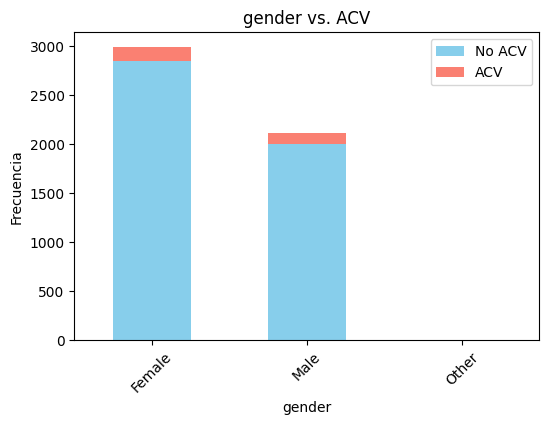


Tabla de contingencia para hypertension vs. ACV
stroke           0    1
hypertension           
0             4429  183
1              432   66

Gráfico de barras apilado para hypertension vs. ACV


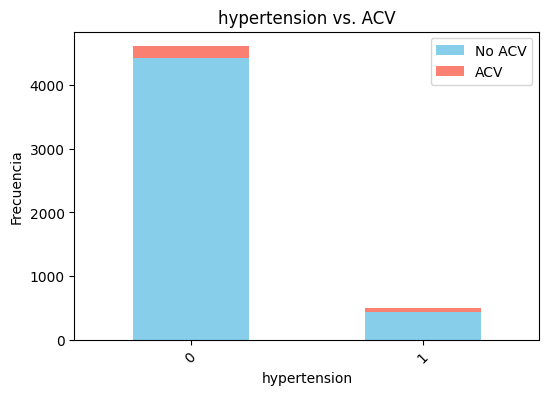


Tabla de contingencia para heart_disease vs. ACV
stroke            0    1
heart_disease           
0              4632  202
1               229   47

Gráfico de barras apilado para heart_disease vs. ACV


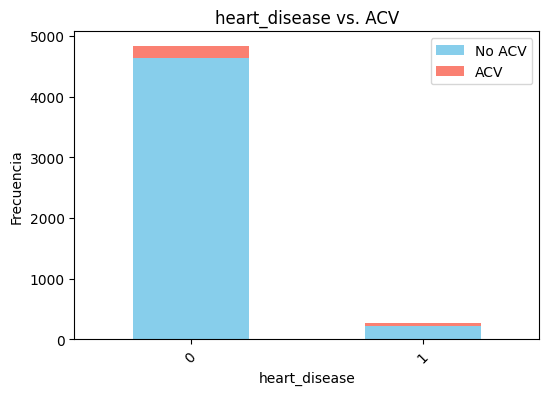


Tabla de contingencia para ever_married vs. ACV
stroke           0    1
ever_married           
No            1728   29
Yes           3133  220

Gráfico de barras apilado para ever_married vs. ACV


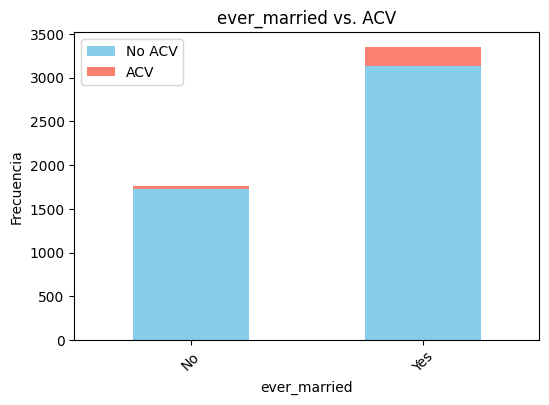


Tabla de contingencia para work_type vs. ACV
stroke            0    1
work_type               
Govt_job        624   33
Never_worked     22    0
Private        2776  149
Self-employed   754   65
children        685    2

Gráfico de barras apilado para work_type vs. ACV


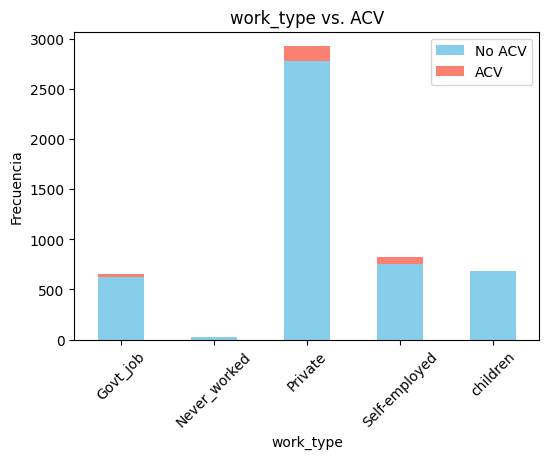


Tabla de contingencia para Residence_type vs. ACV
stroke             0    1
Residence_type           
Rural           2400  114
Urban           2461  135

Gráfico de barras apilado para Residence_type vs. ACV


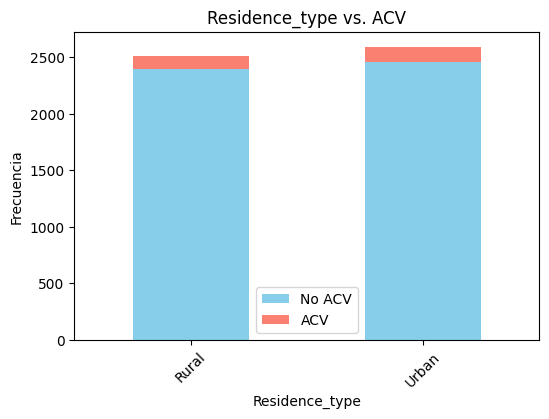


Tabla de contingencia para smoking_status vs. ACV
stroke              0   1
smoking_status           
Unknown          1497  47
formerly smoked   815  70
never smoked     1802  90
smokes            747  42

Gráfico de barras apilado para smoking_status vs. ACV


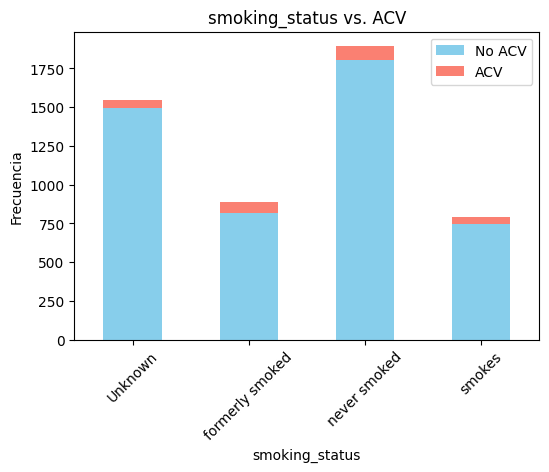

In [ ]:
# Análisis Bivariado - Variables Categóricas vs. ACV

# Lista de variables categóricas
categorical_vars = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Tablas de contingencia y gráficos de barras apilados
for var in categorical_vars:
    print(f"\nTabla de contingencia para {var} vs. ACV")
    contingencia = pd.crosstab(stroke_dataset[var], stroke_dataset['stroke'])
    print(contingencia)

    # Gráfico de barras apilado
    print(f"\nGráfico de barras apilado para {var} vs. ACV")
    contingencia.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(6,4))
    plt.title(f'{var} vs. ACV')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.legend(['No ACV', 'ACV'])
    plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
    plt.show()

#Distribucion de Variables Numercias stroke == 1



Distribución de Variables Numéricas en Casos con ACV


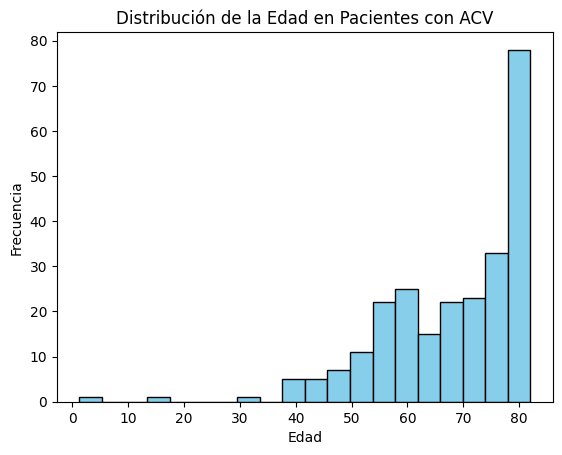

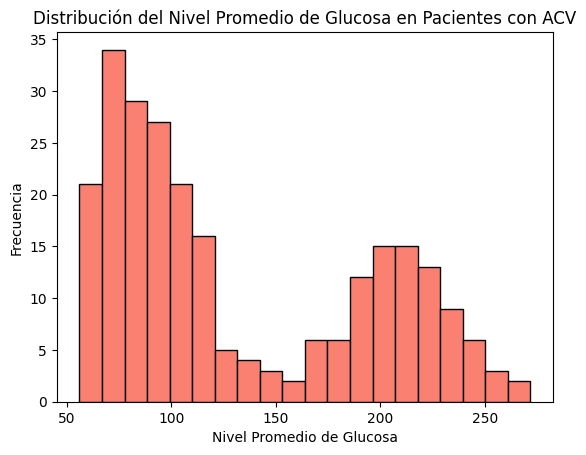

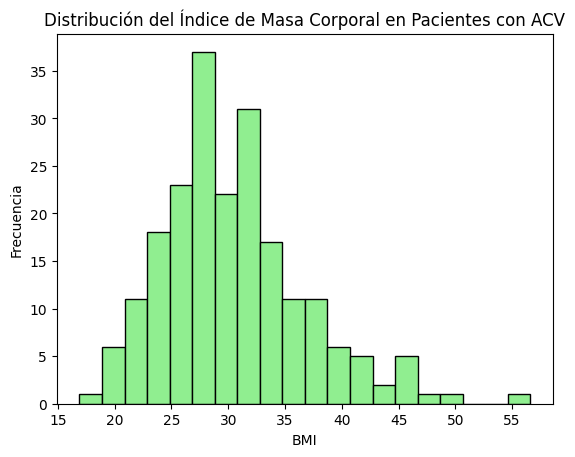

In [ ]:
# Filtrar el dataset para incluir solo los casos donde hubo ACV (stroke == 1)
stroke_cases = stroke_dataset[stroke_dataset['stroke'] == 1]

# Análisis de Distribución - Variables Numéricas (casos con ACV)
print("\nDistribución de Variables Numéricas en Casos con ACV")

# Histograma de la edad en pacientes con ACV
plt.hist(stroke_cases['age'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribución de la Edad en Pacientes con ACV')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Histograma del nivel promedio de glucosa en pacientes con ACV
plt.hist(stroke_cases['avg_glucose_level'], bins=20, edgecolor='black', color='salmon')
plt.title('Distribución del Nivel Promedio de Glucosa en Pacientes con ACV')
plt.xlabel('Nivel Promedio de Glucosa')
plt.ylabel('Frecuencia')
plt.show()

# Histograma del BMI en pacientes con ACV
plt.hist(stroke_cases['bmi'], bins=20, edgecolor='black', color='lightgreen')
plt.title('Distribución del Índice de Masa Corporal en Pacientes con ACV')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.show()


#Distribucion de Variables Categoricas stroke == 1


Distribución de Variables Categóricas en Casos con ACV

Distribución de la variable 'gender' en pacientes con ACV


<ipython-input-11-4fd746682c10>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=stroke_cases[var], palette='pastel', order=stroke_cases[var].value_counts().index)


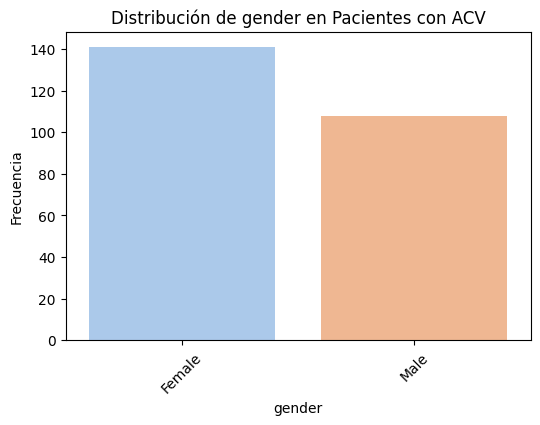


Distribución de la variable 'hypertension' en pacientes con ACV


<ipython-input-11-4fd746682c10>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=stroke_cases[var], palette='pastel', order=stroke_cases[var].value_counts().index)


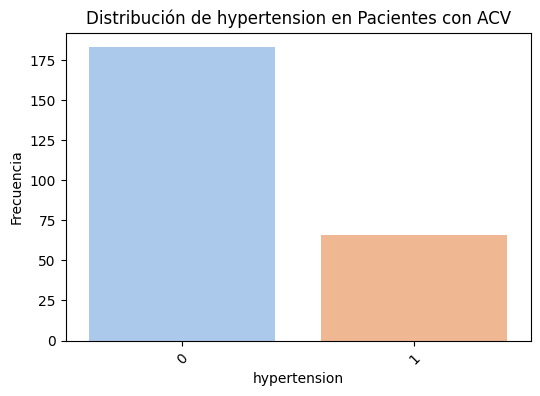


Distribución de la variable 'heart_disease' en pacientes con ACV


<ipython-input-11-4fd746682c10>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=stroke_cases[var], palette='pastel', order=stroke_cases[var].value_counts().index)


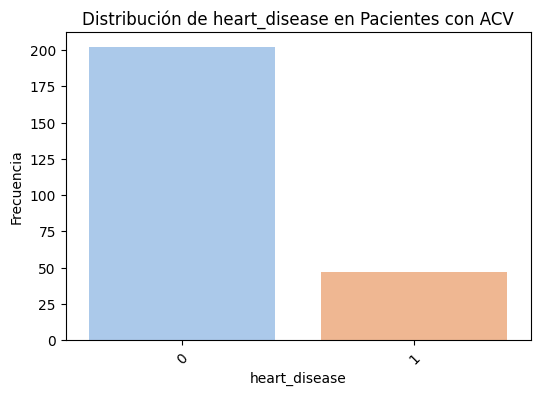


Distribución de la variable 'ever_married' en pacientes con ACV


<ipython-input-11-4fd746682c10>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=stroke_cases[var], palette='pastel', order=stroke_cases[var].value_counts().index)


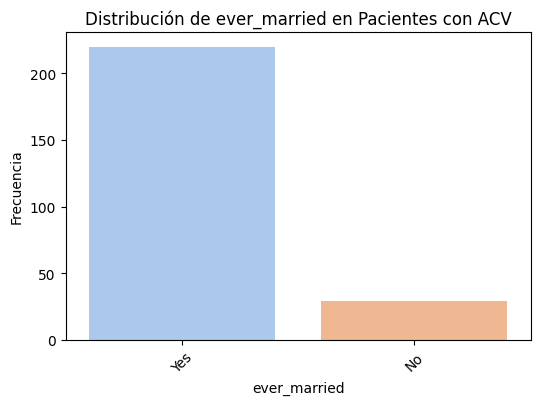


Distribución de la variable 'work_type' en pacientes con ACV


<ipython-input-11-4fd746682c10>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=stroke_cases[var], palette='pastel', order=stroke_cases[var].value_counts().index)


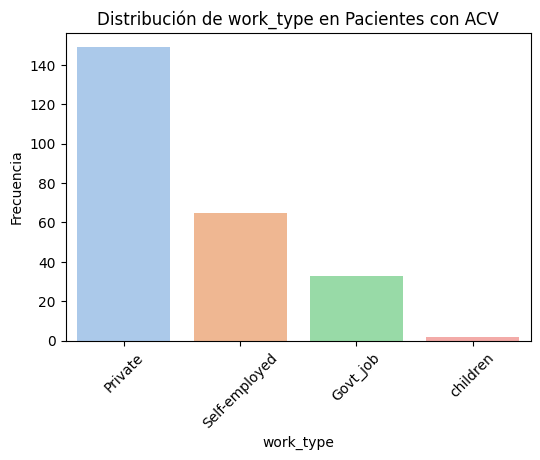


Distribución de la variable 'Residence_type' en pacientes con ACV


<ipython-input-11-4fd746682c10>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=stroke_cases[var], palette='pastel', order=stroke_cases[var].value_counts().index)


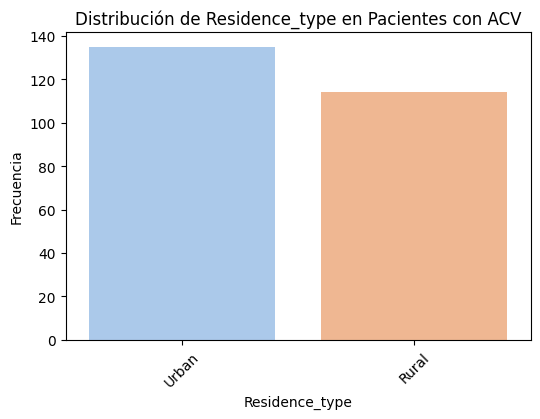


Distribución de la variable 'smoking_status' en pacientes con ACV


<ipython-input-11-4fd746682c10>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=stroke_cases[var], palette='pastel', order=stroke_cases[var].value_counts().index)


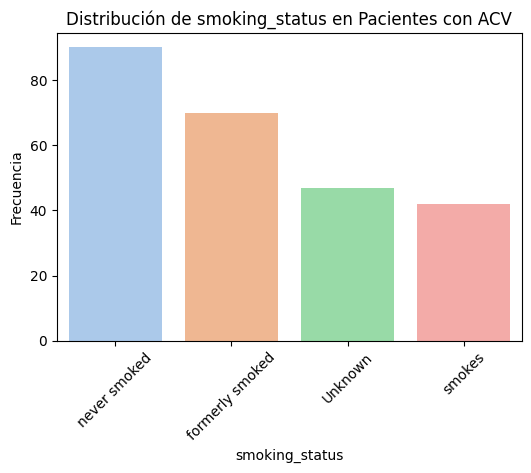

In [ ]:
# Análisis de Distribución - Variables Categóricas en Casos con ACV
print("\nDistribución de Variables Categóricas en Casos con ACV")

# Lista de variables categóricas
categorical_vars = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Gráficos de barras para cada variable categórica (solo donde stroke == 1)
for var in categorical_vars:
    print(f"\nDistribución de la variable '{var}' en pacientes con ACV")
    plt.figure(figsize=(6, 4))
    sns.countplot(x=stroke_cases[var], palette='pastel', order=stroke_cases[var].value_counts().index)
    plt.title(f'Distribución de {var} en Pacientes con ACV')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
    plt.show()


#Analisis de Correlacion



Matriz de Correlación entre Variables Numéricas
                        age  avg_glucose_level       bmi    stroke
age                1.000000           0.238171  0.333398  0.245257
avg_glucose_level  0.238171           1.000000  0.175502  0.131945
bmi                0.333398           0.175502  1.000000  0.042374
stroke             0.245257           0.131945  0.042374  1.000000


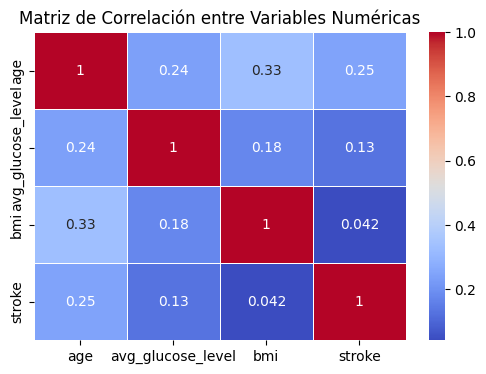

In [ ]:
# Análisis de Correlación - Variables Numéricas

# Matriz de correlación
print("\nMatriz de Correlación entre Variables Numéricas")
correlacion = stroke_dataset[['age', 'avg_glucose_level', 'bmi', 'stroke']].corr()
print(correlacion)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(6,4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()
